In [13]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Parte 1

Ejercicio1

<function matplotlib.pyplot.show(close=None, block=None)>

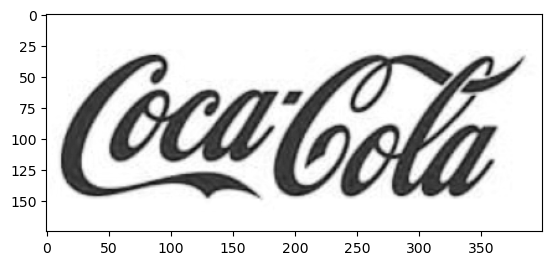

In [14]:
pattern= cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/template/pattern.png', 0)
plt.imshow(pattern, cmap = 'gray')
plt.show

In [15]:
w_original, h_original = pattern.shape[::-1]
print(f'Width: {w_original}\nHeight: {h_original}')

Width: 400
Height: 175


In [16]:
def deteccion_logo__(scale, template, img, meth, threshold):
    img_salida = img.copy()
    img_gray = cv.cvtColor(img_salida, cv.COLOR_BGR2GRAY)
    edges = cv.Canny(img_gray, threshold1=threshold, threshold2=threshold)
    
    template  = cv.resize(template, None, fx=scale, fy=scale)
    template = cv.Canny(template, threshold1=threshold, threshold2=threshold)
        
    w, h = template.shape[::-1]
    
    method = eval(meth)
    
    res = cv.matchTemplate(edges, template, method)
    
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida,top_left, bottom_right, 0, 5)

    plt.figure()

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.show()

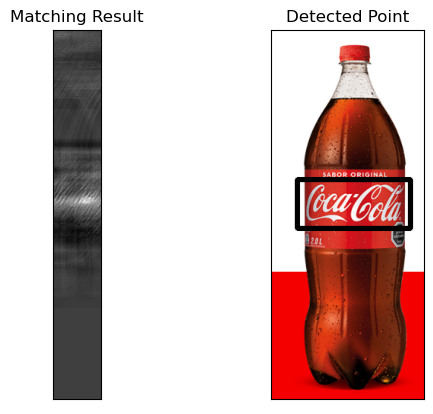

In [17]:
coca_logo_1 = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/coca_logo_1.png')
coca_logo_1 = cv.cvtColor(coca_logo_1, cv.COLOR_BGR2RGB)
deteccion_logo__(0.38, pattern, coca_logo_1, 'cv.TM_CCOEFF', 500)


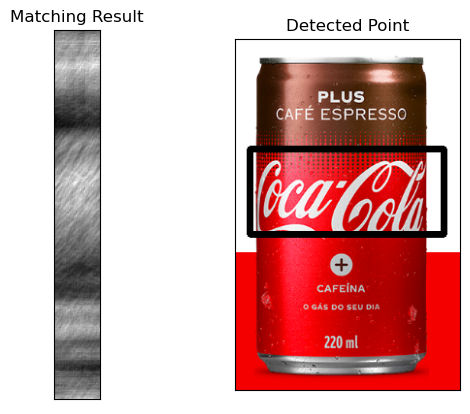

In [18]:
coca_logo_2 = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/coca_logo_2.png')
coca_logo_2 = cv.cvtColor(coca_logo_2, cv.COLOR_BGR2RGB)
deteccion_logo__(0.5, pattern, coca_logo_2, 'cv.TM_CCOEFF_NORMED', 200)

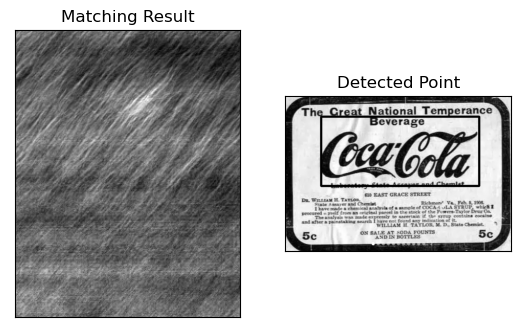

In [19]:
coca_retro_1 = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/coca_retro_1.png')
coca_retro_1 = cv.cvtColor(coca_retro_1, cv.COLOR_BGR2RGB)
deteccion_logo__(1.25, pattern, coca_retro_1, 'cv.TM_CCOEFF',400)

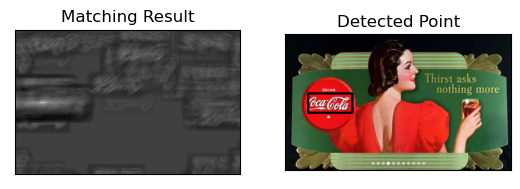

In [20]:
coca_retro_2 = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/coca_retro_2.png')
coca_retro_2 = cv.cvtColor(coca_retro_2, cv.COLOR_BGR2RGB)
deteccion_logo__(0.35, pattern, coca_retro_2, 'cv.TM_CCOEFF_NORMED', 500)

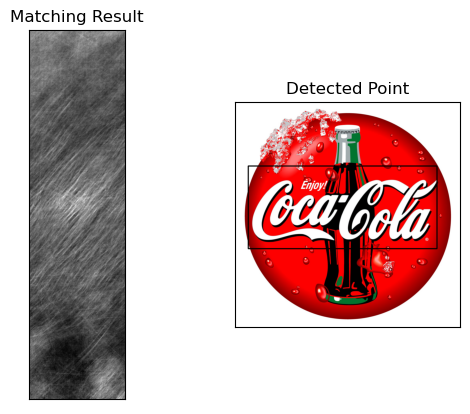

In [21]:
COCA_COLA_LOGO = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/COCA-COLA-LOGO.jpg')
COCA_COLA_LOGO = cv.cvtColor(COCA_COLA_LOGO, cv.COLOR_BGR2RGB)
deteccion_logo__(2.9, pattern, COCA_COLA_LOGO, 'cv.TM_CCORR_NORMED', 200)

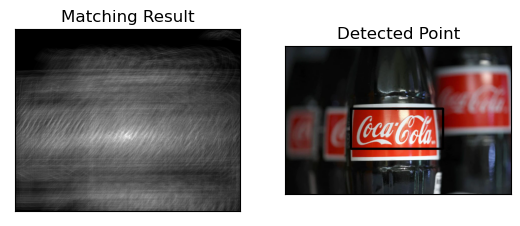

In [22]:
logo_1 = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/logo_1.png')
logo_1 = cv.cvtColor(logo_1, cv.COLOR_BGR2RGB)
deteccion_logo__(0.7, pattern, logo_1, 'cv.TM_CCORR_NORMED', 200)

Ejercicio 2

In [68]:
def deteccion_logo_multiples_(scale, template, img, meth, threshold):
    img_salida = img.copy()
    img_gray = cv.cvtColor(img_salida, cv.COLOR_BGR2GRAY)
    edges = cv.Canny(img_gray, threshold1=threshold, threshold2=threshold)
    
    template  = cv.resize(template, None, fx=scale, fy=scale)
    template = cv.Canny(template, threshold1=threshold, threshold2=threshold)
        
    w, h = template.shape[::-1]
    
    method = eval(meth)
    
    res = cv.matchTemplate(edges, template, method)
    
    #min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    threshold = 0.25

    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv.rectangle(img_salida, pt, (pt[0] + w, pt[1] + h), (100,255,255), 1)
    
    plt.figure()

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.show()

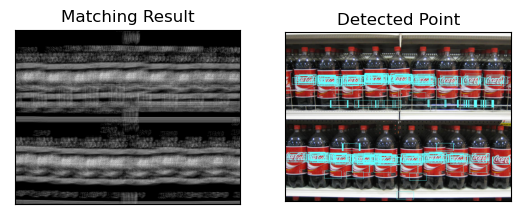

In [69]:
coca_multi = cv.imread('/Users/brunorais/EspecializacionIA/vision_computadora_I/Material_TPs/TP3/images/coca_multi.png')
coca_multi = cv.cvtColor(coca_multi, cv.COLOR_BGR2RGB)
deteccion_logo_multiples_(0.15, pattern, coca_multi, 'cv.TM_CCORR_NORMED', 500)

In [34]:
coca_multi.shape

(598, 799, 3)

In [32]:
pattern.shape

(175, 400)

<function matplotlib.pyplot.show(close=None, block=None)>

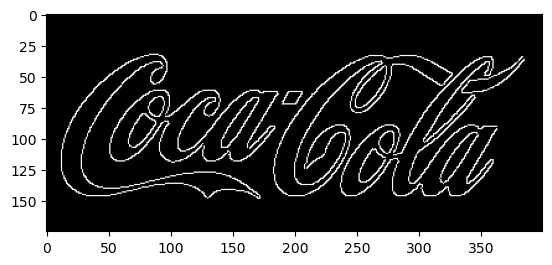

In [25]:
# Cargo la imagen
#================
#mg = cv.imread('chewbacca.jpg')
#gray = cv.cvtColor(pattern, cv.COLOR_BGR2GRAY)

# Aplico Canny
#=============
#start = time.time()
edges = cv.Canny(pattern, threshold1=200, threshold2=200)
#elapsed = time.time()-start
#print('Tiempo de procesamiento {} segundos'.format(elapsed))

# Muestro la imagen
#==================
plt.imshow(edges, cmap = 'gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

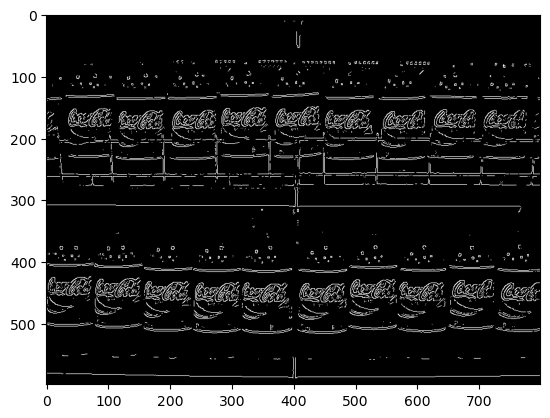

In [29]:

gray = cv.cvtColor(coca_multi, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, threshold1=500, threshold2=500)
#elapsed = time.time()-start
#print('Tiempo de procesamiento {} segundos'.format(elapsed))

# Muestro la imagen
#==================
plt.imshow(edges, cmap = 'gray')
plt.show